# Know Your AI: Developing a Framework to Address Bias in Facial Expression Recognition

## PART 2: Training a Convolutional Neural Network (CNN) to Recognize Multicultural Facial Expressions

### INTRODUCTION
In this notebook, **I implement a framework to address bias in artificial intelligence (AI) through building a Convolutional Neural Network (CNN) to detect multicultural facial expressions.** Bias in AI occurs for many reasons, but here are three primary factors that I will directly address in this project: 
 - **The Data**: How and what data is collected
 - **The Person**: Who is collecting and analyzing the data
 - **The Framework**: The frameworks used to analyze that data

The data that is being collected is not inclusive or it's selectively chosen to promote a certain narrative. Additionally, the people who are making decisions to control a data-driven project affect the outcomes of that project. Finally, the frameworks used to analyze data are considered objective when in fact they are not. You cannot actually mitigate bias in AI if you don't take into consideration _at least_ these three factors. For example, an AI initiative that collects inclusive data but the team handling the data is not representative of the data is not mitigating bias. An AI initiative that has both an inclusive team and dataset that implements a framework as objective truth is not mitigating bias in AI. 

Here's how I attempt to mitigate bias in AI through addressing the three aforementioned factors: 
 - **The Data**: I made sure to include images people of color, gender non-conforming people, young and old people in the dataset that I would use to train my model.
 - **The Person**: I am affected by and deeply concerned by bias in AI.
 - **The Framework**: I'm building a CNN model to detect facial expressions from images of people's faces. Typically, the categories used to classify facial expressions are emotions like happy, sad, angry, surprised, and so on. But facial expressions are not the same for all cultures. For example, a wink here (whereever "here" is for you) may not mean the same thing somewhere else. To classify and predict facial expressions, I'm not just simply using a framework like happy, sad, angry, etc. Instead, I'm using a framework that pushes back against the notion that emotions are universal. For this project, I classify and understand emotions according to the "navarasa" (or, nine emotions). 
 

**The Framework: Navarasa**
![](./images/display_images/navarasa_banner.png)

The navarasa were defined in the Sansrkit text, _Natya Shastra_ (200 BCE - 200 CE or 500 BCE - 500 CE) (1), written by Bharata Muni who was a South Asian theatrologist and musicologist. The _Natya Shastra_ is considered to be the foundational text for classical South Asian arts today. The _Natya Shastra_ coined the Sanskrit term _rasa_, which can be literally translated to mean  "sap" or "juice", but can also mean “essence,” “taste,” “flavor,” or "emotion" (2). In the text, Bharata states that the navarasa are "the basis of all human emotions" (3). The navarasa are: 
  - 1: 'adbhuta (astonishment)', 
  - 2: 'bibhatsa (disgust)', 
  - 3: 'bhayanaka (fear)', 
  - 4: 'hasya (joy)', 
  - 5: 'karuna (sorrow)', 
  - 6: 'roudra (anger)', 
  - 7: 'santa (peace)', 
  - 8: 'srngara (love)', 
  - 9: 'veera (confidence)'

There is so much more to explain about the navarasa, but I will leave at that for the sake of this project. With more time and resources, I hope to dive deeper into the concept of the navarasa and other cultural expressions to develop more nuanced AI frameworks. For now, this is enough to understand how the navarasa are used in this project. 

Sources: 
- (1) https://en.wikipedia.org/wiki/Bharata_Muni
- (2) https://www.britannica.com/art/rasa
- (3) https://www.telegraphindia.com/opinion/powerful-feelings/cid/1448393

---
### METHODOLOGY 

**Goal**: Develop a CNN model to predict facial expressions according to the navarasa by using images of people's faces as my dataset

**Steps to achieve goal**: 
- Prep data 
- Build and test various CNN models
- Make predictions based on best performing model 

---

### CONTENTS (UPDATE)
- [**Import Libraries**](#Import-Libraries)
- [**Import image data**](#Import-image-data)
- [**Train/Test Split**](#Train/Test-Split)
- [**Baseline Score**](#Baseline-Score)
- [**CNN Model 1: Original Dataset**](#CNN-Model-1:-Original-Dataset)
 - [Design Neural Network](#Design-Neural-Network)
 - [Save Weights](#Save-Weights)
 - [Visualize loss and accuracy over epoch](#Visualize-loss-and-accuracy-over-epoch)
 - [Model Summary](#Model-Summary)
- [**CNN Model 2: Data Augmentation**](#CNN-Model-2-Data-Augmentation)
 - [Preview data augmentation](#Preview-data-augmentation)
 - [Design Neural Network](#Design-Neural-Network)
   - [Set parameters for data augmentation](#Set-parameters-for-data-augmentation)
 - [Save Weights](#Save-Weights)
 - [Visualize loss and accuracy over epoch](#Visualize-loss-and-accuracy-over-epoch)
- [**CNN Model 3: VGG16**](#CNN-Model-3-VGG16)
 - [Pre-process data](#Pre-process-data)
   - [Convert grayscale arrays to RGB arrays](#Convert-grayscale-arrays-to-RGB-arrays)
   - [Set parameters for data augmentation](#Set-parameters-for-data-augmentation)
 - [Set up and run VGG model](#Set-up-and-run-VGG-model)
 - [Save Weights](#Save-Weights)
 - [Visualize loss and accuracy over epoch](#Visualize-loss-and-accuracy-over-epoch) 
 - [Model Summary](#Model-Summary)
- [**Make Predictions**](#Make-predictions!)
 - [Reverse changes made to testing data](#Reverse-changes-made-to-testing-data)
 - [Visualize prediction probabilities of rasas (emotions)](#Visualize-prediction-probabilities-of-rasas-(emotions))
 - [Predict vs Actual Visualization](#Predict-vs-Actual-Visualization)
 - [Confusion Matrix](#Confusion-Matrix)
- [**Conclusion and Next Steps**](#Conclusion-and-Next-Steps)

# Import Libraries

In [1]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import os

# Modeling libraries 
from sklearn.model_selection import train_test_split

# ConvNet Processing Libraries
#from PIL import Image
import keras
from keras.utils import np_utils, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16

# Model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# For reproducibility
np.random.seed(2019)

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Check keras version
import keras
keras.__version__

'2.1.5'

# Import image data

When I import my image data, I'll read in a csv file that contains the image pixel values for all my images. I created the csv file in my previous notebook, "1_Image_Processing". The csv file, `image_pixels.csv`, has 1035 rows and 8253 columns. Each row corresponds to an image, meaning there are 1035 images in my dataset. Each column corresponds to the a pixel value. Since my image dimensions are 75 by 110 pixels, there are a total of 8250 pixels per image. The additional 3 columns include an unnamed column (which will be dropped), the rasa label as an integer, and the rasa label as a string--what this means is that for each of the nine rasas, there is a corresponding number associated with the rasas (e.g., "astonishment": 0, "disgust": 1, "fear":2, and so on).

When I load the csv file, I'll read it in as a pandas DataFrame. I'll then create my predictor `X` and target `y` variables so that I can begin processing my data for modeling.

## Import Data

After importing the image pixels as a DataFrame, create predictor `X` and target `y` variables. My `X` variables will be image pixels, and the `y` variables will be the image labels (or the navarasa/nine emotions). My predictor and target variables need to be converted to numpy arrays in order to be processed in the CNN models. In particular, the `X` variables need to be reshaped into three-dimensional numpy arrays in the shape of (1, 110, 75) -- this means that there is one image with the dimensions of 110 x 75. Each value in the `X` array will correspond to 0-255, which is the pixel range for grayscale images. 0 is black and 255 is white, everything in between is a shade of gray.

In [3]:
# Read in image data
image_data = pd.read_csv('./data/image_pixels.csv')

In [4]:
# Show shape of data
print(f'Shape: {image_data.shape}')
print(f'There are {image_data.shape[0]} images in this dataset!') 

Shape: (1035, 8253)
There are 1035 images in this dataset!


In [5]:
# Drop column in DataFrame
image_data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Preview head
image_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,8242,8243,8244,8245,8246,8247,8248,8249,rasa_num_labels,rasas_string_labels
0,65,64,63,64,66,67,66,64,59,67,...,255,252,255,252,254,255,255,255,0,adbhuta (astonishment)
1,0,5,2,0,6,8,4,6,7,2,...,255,255,251,250,255,246,245,100,0,adbhuta (astonishment)


### Create predictor `X` variable

My `X` variable will contain image pixels. I need to pre-process my `X` variable to make sure it's ready to be run through my model. The only pre-processing step I need to take here is reshaping the array. I explain more a few cells below.

In [7]:
# Create variable to hold only pixel data
pixels = [col for col in image_data.columns if (col != 'rasa_num_labels') &  (col != 'rasas_string_labels')]

In [8]:
# Preview image pixel values 
image_data[pixels].head(2)

,0,1,2,3,4,5,6,7,8,9,...,8240,8241,8242,8243,8244,8245,8246,8247,8248,8249
0,65,64,63,64,66,67,66,64,59,67,...,150,246,255,252,255,252,254,255,255,255
1,0,5,2,0,6,8,4,6,7,2,...,246,243,255,255,251,250,255,246,245,100


Notice in the DataFrame above that the image pixels are still flattened, meaning that you can't tell what the dimensions of the images are. What I'm going to do next, in the cell below, is reshape these pixels so that they resemble my image dimensions. Instead of each row corresponding to one image, I need one image to have 110 rows and 75 columns--and an array is the format to do this in. The 110 rows corresponds to the images' height, and the 75 columns corresponds to the images' width. The values of the pixels are a range between 0-255. I talk about this in more detail later. 

In [9]:
# Convert DataFrame to array, and reshape to a three-dimensional array
X = image_data[pixels].values.reshape(image_data.shape[0], 110, 75)

# Check shape of X array 
print(f'The shape of the X array is: {X.shape}')

The shape of the X array is: (1035, 110, 75)


In [10]:
# Preview what `X` looks like. This is the first image in the dataset, with pixel range 0-255.
X[0]

array([[ 65,  64,  63, ...,  72,  72,  72],
       [ 64,  63,  62, ...,  72,  72,  72],
       [ 64,  63,  61, ...,  72,  72,  72],
       ...,
       [142, 141, 142, ..., 255, 255, 255],
       [156, 146, 141, ..., 255, 255, 255],
       [145, 133, 131, ..., 255, 255, 255]])

### Create target `y` variable

My `y` variable will contain image labels (the pre-assigned rasa for each image). I already conducted my pre-processing steps here in my previous notebook, "1_Image_Processing", where I assigned an interger to a rasa. So the range of values in my `y` value is 0 through 8, where each interger corresponds to a particular rasa. 

In [11]:
# Convert labels column to array
y = image_data['rasa_num_labels'].values

# Check shape of y array 
print(f'The shape of the y array is: {y.shape}')

The shape of the y array is: (1035,)


In [12]:
# Preview what `y` looks like. The first ten images have the rasa label "0", 
# the last ten have the rasa label "8"
print(y[0:10])
print(y[1026:])

[0 0 0 0 0 0 0 0 0 0]
[8 8 8 8 8 8 8 8 8]


## Visualize image pixels to make sure everything was processed correctly

As you can see in the graphs below, the range of x-axis is 0-75, and the y-axis is 0-110. When the numpy arrays were reshaped into three-dimensional arrays, you can plot the image pixels on a graph and it will show you an image. As previously mentioned, the values of grayscale pixels are between 0-255, 0 being black and 255 being white, and everything in between a different shade of gray. Here's an example below. 
Image source: http://ai.stanford.edu/~syyeung/cvweb/tutorial1.html

![](./images/display_images/imagematrix.png)

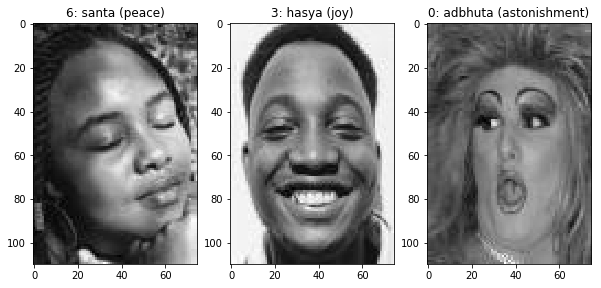

In [13]:
# Plot random images to check if images were processed correctly
fig, axes = plt.subplots(1, 3, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(X[730], cmap=plt.cm.gray)
ax[0].set_title(f'{y[730]}: {image_data["rasas_string_labels"].loc[730]}')
ax[1].imshow(X[358], cmap=plt.cm.gray)
ax[1].set_title(f'{y[358]}: {image_data["rasas_string_labels"].loc[358]}')
ax[2].imshow(X[110], cmap=plt.cm.gray)
ax[2].set_title(f'{y[110]}: {image_data["rasas_string_labels"].loc[110]}')
fig.savefig(f'./images/dataviz/navarasa_preview_dataset_small.png', bbox_inches = 'tight');

[Image on far right source.](https://www.flickr.com/photos/elsie/194190566/in/photolist-iah6d-Ef1spU-4WGJUf-8fMdRs-ibsSwE-Q8B4nc-tcfam-86DEUW-9WgVjD-8fMfpL-2bk9r3T-SaFyS9-2cjBMSL-4d6ZZY-au9oGf-8VQcD4-AeeVZ-f1twt6-3ZNYnZ-3DESNa-cxm8Jj-bnJ7iV-jswjT-8bee5i-Za363N-8muQCn-8NpcVz-9HH3cE-eAgFtY-cK8Ukf-fw6jh2-eAgNEQ-5fRiqV-8VQ8bg-8Nsikm-HZXa6L-6xQbxB-oVLY2z-9DgEpY-eAgKFA-9DdKkx-8cie2v-24uiHV-8bYaeJ-N27C7-5mtZsF-2a76gzY-8esBcb-riaFPr-2U22rj)

# Train/Test Split

Train/test split is taking my original dataset of image pixels and image labels, and splitting it into a training set and test set. I will "train" my model on my training set, and then I'll use my testing set as if it's unseen data and pass it through my model. Train/test split will help me determine if my model will perform well on more unseen data.

After train/test splitting, I need to conduct additional pre-processing to my data to make sure it's ready to be run through my CNN models. In summary, I conducted the following pre-processing steps in this section: 
 - 1. Convert pixel values (0-255) to percentages (e.g., 1.0 to indicate 100%, 0.75 to indicate 75%, etc)
 - 2. Reshape `X` array from `(110, 75)` to `(110, 75, 1)`
 - 3. Convert `y` rasa interger values 0-8 to categorical values 

In [14]:
# Train/test split, and stratify y since this is a classification problem
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    stratify=y) # Stratify for classification 

In [15]:
# An array of arrays. 
# Each array is an individual image, each value is the value range of a pixel (0-255)
X_train[0]

array([[ 11,  12,  16, ...,  31,  35,  40],
       [ 10,  15,  20, ...,  25,  29,  34],
       [ 14,  19,  25, ...,  25,  27,  30],
       ...,
       [ 94,  97, 103, ..., 146, 142, 137],
       [ 95,  94,  97, ..., 150, 144, 138],
       [ 94,  91,  93, ..., 152, 146, 139]])

In [16]:
# Each image is 110 pixels by 75 pixels
print(f'Image dimensions: {X_train[0].shape}')

Image dimensions: (110, 75)


In [17]:
# Save a copy of these arrays before processing
# I can use these unaltered arrays to make predictions later
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

### Convert `X_train`/`X_test` values to percentages

In the cell below, I'm converting my pixel values to floats and then dividing them by 255 because I want to get a percentage value between 0 and 1. Now if a pixel is 1 (or 100%), that means it's white. And if it's 0 (or 0%) that means it's black. If the pixel is 0.75, then that means the pixel is probably going to be a light gray, and if it's 0.25 then it's going to be a dark gray. Converting my pixel values to percentages between 0 and 1 helps increase processing time by increasing computational efficiency. 

In [18]:
# Convert each value to a float, since we want to divide and get a percentage value.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# This scales each value to be between 0 and 1 (0 - 100%)
X_train /= 255
X_test /= 255

In [19]:
# Check scaled values
X_train[0][0]

array([0.04313726, 0.04705882, 0.0627451 , 0.08627451, 0.09803922,
       0.09803922, 0.07843138, 0.05882353, 0.03529412, 0.06666667,
       0.09411765, 0.09803922, 0.08235294, 0.07450981, 0.09019608,
       0.10980392, 0.10588235, 0.09019608, 0.10196079, 0.13333334,
       0.14117648, 0.12941177, 0.14509805, 0.1882353 , 0.23529412,
       0.27450982, 0.30980393, 0.29803923, 0.25490198, 0.23529412,
       0.25490198, 0.28627452, 0.24313726, 0.21568628, 0.18039216,
       0.16470589, 0.16470589, 0.16862746, 0.16862746, 0.16078432,
       0.14117648, 0.10196079, 0.09803922, 0.13333334, 0.14117648,
       0.10196079, 0.07450981, 0.08235294, 0.11764706, 0.09019608,
       0.07843138, 0.09411765, 0.10196079, 0.08627451, 0.08627451,
       0.09803922, 0.11372549, 0.15294118, 0.14117648, 0.12941177,
       0.17254902, 0.19215687, 0.1764706 , 0.1764706 , 0.14901961,
       0.09019608, 0.04705882, 0.04705882, 0.04313726, 0.01960784,
       0.03529412, 0.07058824, 0.12156863, 0.13725491, 0.15686

In [20]:
# Check shape
print(f'Shape of training set: {X_train.shape}')

# Check shape
print(f'Shape of testing set: {X_test.shape}')

Shape of training set: (776, 110, 75)
Shape of testing set: (259, 110, 75)


### Reshape `X_train`/`X_test` arrays

An important part of pre-processing images to run through a CNN model is reshaping images. Since my dataset consists of grayscale images (and not the tri-color RGB), I want to reshape my images to be `(110, 75, 1)`. This three dimensional array now allows the CNN to know that each value corresponds to how light or dark a pixel is. 

In [21]:
# Reshape images
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [22]:
# Check new reshape (making it show only one since X_train[0][0] shows a long list of arrays)
X_train[0][0][0]

array([0.04313726], dtype=float32)

In [23]:
# New shape of training set
print(f'New shape of training data: {X_train.shape}')
print(f'There are {X_train.shape[0]} images in my train dataset.')
print('-'*40)
# New shape of training set
print(f'New shape of testing data: {X_test.shape}')
print(f'There are {X_test.shape[0]} images in my test dataset.')

New shape of training data: (776, 110, 75, 1)
There are 776 images in my train dataset.
----------------------------------------
New shape of testing data: (259, 110, 75, 1)
There are 259 images in my test dataset.


In [24]:
# Show shape of y train
print(f'Shape of y_train: {y_train.shape}')

# Show shape of y test
print(f'Shape of y_test: {y_test.shape}')

Shape of y_train: (776,)
Shape of y_test: (259,)


In [25]:
# Preview of y labels
y_train[0:9]

array([0, 6, 4, 8, 6, 0, 3, 5, 3])

### Convert `y_train`/`y_test` to categorical values

For multiclassification problems in keras, I can no longer have multi-index ranges as our `y` values, for example, 0-8. Instead, I have to one-hot encode my `y` variables. If you look below, you'll see an array with 0s and a 1 that appears once in a row. Each "column" of the array represents a rasa. If a 1 appears in a specific column, that means that that image belongs to the corresponding rasa. When I build my CNN model, the output layer has one neuron for each emotion (so, 9 neurons).

In [26]:
# Save a non-converted y_test for when I make predictions. I'll need it.
y_test_copy = y_test.copy() 

# Convert y to a categorical variable, 0-1 (0-100%)
y_train = np_utils.to_categorical(y_train, 9)
y_test = np_utils.to_categorical(y_test, 9)

In [27]:
# Check to see that changes were made, a preview of the first three image labels 
y_train[0:3]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [28]:
# Show shape of y train
print(f'Shape of reshaped y_train: {y_train.shape}')

# Show shape of y test
print(f'Shape of reshaped y_test: {y_test.shape}')

Shape of reshaped y_train: (776, 9)
Shape of reshaped y_test: (259, 9)


# Baseline Score

Predicting facial expressions according to the nine rasas (navarasa) is a classification problem. Because I'm working on a classification problem, I need to determine what my baseline score is. The baseline score is the percentage of the majority class. I can use this score to determine how well my model is performs. If my model's accuracy score is too similar to or less than my baseline score, then that means that my model is inefficient at making predictions. 

In [29]:
# Show total number of images per rasa in entire dataset
image_data['rasas_string_labels'].value_counts(normalize=True)

hasya (joy)               0.128502
srngara (love)            0.116908
adbhuta (astonishment)    0.111111
bibhatsa (disgust)        0.108213
veera (confidence)        0.108213
bhayanaka (fear)          0.108213
santa (peace)             0.107246
roudra (anger)            0.106280
karuna (sorrow)           0.105314
Name: rasas_string_labels, dtype: float64

In [30]:
# Show class with the highest percentage
image_data['rasas_string_labels'].value_counts(normalize=True)[[0]]

hasya (joy)    0.128502
Name: rasas_string_labels, dtype: float64

In [31]:
# Print statement to say what the baseline score is
baseline_score = round(image_data['rasas_string_labels'].value_counts(normalize=True)[0],3)*100
print(f'My model must perform better than {baseline_score}% in order to predict more than just the plurality class.')

My model must perform better than 12.9% in order to predict more than just the plurality class.


# CNN Model 1: Unmodified Dataset

CNN model #1 is processing the original dataset with no modifications to the images. Typically, CNN models with small datasets tend to become overfit, which we'll see below in the loss and accuracy scores. Below is a illustrative graphic that shows what is happening at each layer of the convnet model #1. What you're seeing in the graphic is an image (the input) being passed through the model, and a filter (`Conv2D`) passing through the image and taking the dot product of the pixel values and applying `relu` (Rectified Linear Unit) to get a number between 0 and infinity. The pooling layer (`MaxPooling2D`) takes the maximum values from the convolution layer and reduces the dimensions of the image (and also helps speed up processing time). The flattened layer (`Flatten()`) takes the image pixels in the previous layer and flattens it out (5 x 2 x 128 = 1280). The `Dropout` layer randomly ignores certain neurons and helps prevent overfitting. The densely connected layer (`Dense`) is connected to every node in the previous layer and applies ReLu to its output values. Finally, the output layer (also `Dense`) applies the `softmax` activation function to show probabilities for all nine emotions, and all of the probabilities will add up to 1.

![](./images/display_images/cnn_model_1_graphic_.png)

## Design Neural Network 

Here I build the layers of my convnet (short for "convolutional neural network"). The `Conv2D` layers are 2D convolutional layers that is specific to images. These layers slide over the image depending on the `kernel_size`, or dimensions of the "slider". The slider computes the dot product of the pixels. The `MaxPooling2D` layers takes the maximum values from the `Conv2D` thereby reducing the dimensions of the image. Finally, the pixels are flattened, the `Dropout` regularization is initiated, and a `Dense` layer is added, which is connected to the final output layer with nine neurons, corresponding to the nine rasas.

In [32]:
# Instantiate Convolutional Neural Network
cnn_model = Sequential()

# First conv module: input layer 
cnn_model.add(Conv2D(filters=32, # Hyperparameter: Number of filters
                     kernel_size=(3,3), # Hyperparameter: Filter dimensions
                     activation='relu', # ReLu function, max{0, num}
                     input_shape=X_train[0].shape)) # Shape of the images                     

cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Second conv module
cnn_model.add(Conv2D(filters=64, kernel_size=3, activation='relu')) 
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Third conv module
cnn_model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

# Fourth conv module
cnn_model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer to pass through dense layer
cnn_model.add(Flatten())

# Dropout layer to avoid overfitting
cnn_model.add(Dropout(rate=1 - 0.5))

# Densely connected layer
cnn_model.add((Dense(512, activation='relu')))

# Output layer with nine output neurons
# 'Softmax' activation that normalizes the probabilities from output neurons
cnn_model.add(Dense(y_test.shape[1], activation='softmax')) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile the model

The `compile` layer configures the model before training. Here I specify a `loss` function, `categorical_crossentropy`, which is specific to multiclassification models. This loss function measures the error of predictions. The `adam` optimizer "computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients." Adam, referring to adaptive moment estimation, has many benefits: 
 - straightforward to implement
 - computationally efficient
 - little memory requirements
 - invariant to diagonal rescaling of the gradients
 - well suited for problems that are large in terms of data and/or parameters

Finally, since this is a classification problem, the metric to evaluate the model will be `accuracy`. Accuracy is the measurement of number of correct predictions divided by the total number of predictions. 

Source for `adam` explanation: [Adam: A Method for Stochastic Optimization. Diederik Kingma, Jimmy Ba.](https://arxiv.org/abs/1412.6980v8)

In [33]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy', # Loss function for multiclassification 
                  optimizer='adam', # Speeds up learning rate, adaptive moment estimation
                  metrics=['accuracy']) # Classification metric

### Fit the model

The final step is to `fit` my model. I train my model on my train dataset (`X_train`, `y_train`) and let it learn how to predict the rasa (`y`, target variable) depending on the facial expression shown in the image (`X`, predictor variable). I then use my `validation_data`, or testing data set (`X_test`, `y_test`) to simulate what it would be like if my model were to run on unseen data. The `batch_size` lets me pick the number of samples to run through my model at a time, and `epochs` are the number of iterations my model is run on the datasets. The `verbose` option lets me choose if I want to print the results per epoch or not. I chose `verbose=0` since I'm already visualizing my results in the graph below.

"The `fit()` method on a Keras `Model` returns a `History` object. The `History.history` attribute [which you'll see me using when I visualize my scores] is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values." Source: [Keras: Model Visualization](https://keras.io/visualization/)

In [34]:
# Fit model on training data
history_1 = cnn_model.fit(X_train,
                          y_train,
                          batch_size=64, 
                          validation_data=(X_test, y_test),
                          epochs=39,
                          verbose=0) # 1 if you want list of scores

Instructions for updating:
Use tf.cast instead.


## Save weights

Here, I'm saving my Keras model into a single HDF5 file which will contain:

- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

Direct quote from [Keras FAQ](https://keras.io/getting-started/faq/). 

In [35]:
# Save model weights
cnn_model.save_weights('./data/navarasas_cnn_model_1.h5')  

## Visualize loss and accuracy over epoch

Visualizing my loss and accuracy values will help me easily determine how fit my model is and therefore how well it is performing. Remember, when I compiled my model I selected `categorical_crossentropy` as my loss function, and `accuracy` as my evaluation metric. Since I'll need to replicate the same visualization for each of my models, I'll also create a function to create the graphs. 

### Function to plot accuracy and loss

Since I want to visualize my accuracy and loss scores, I'll need to call those values by accessing the `history` obect. When I call `history.history.keys()`, it shows me all the data categories that the `history` object is collecting. I'm primarily interested in how my testing data does, so I'll use the `val_loss` (validation loss) and `val_acc` (validation accuracy) keys and plot those values. 

In [36]:
# Find the keys to plot below
history_1.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

This is just your regular ol' subplot. I want to make note of one thing. Francois Chollet in "Deep Learning" uses the blue line (`b`) and blue dot (`bo`) format to visualize his plots, and I kind of like the way it looks, so I'm sticking with it--but I've customized it somewhat as you'll see below.

In [37]:
# Function to plot accuracy and loss 
def plot_loss_accuracy(history_var, file_name):
    # Set parameters for subplot
    fig, axes = plt.subplots(1, 2, figsize=(17, 4.5))
    ax = axes.ravel()

    # Plot loss over epochs
    ax[0].plot(history_var.history['loss'], 'm', label='Training Loss')
    ax[0].plot(history_var.history['val_loss'], 'mp', label='Test Loss')

    # Set title
    ax[0].set_title("Training and Testing Loss by Epoch", fontsize = 16)
    ax[0].set_xlabel('Epoch', fontsize = 12)
    ax[0].set_ylabel('Categorical Crossentropy', fontsize = 12)

    # Set legend
    ax[0].legend()

    # Plot accuracy over epochs
    ax[1].plot(history_var.history['acc'], 'm', label='Train Accuracy')
    ax[1].plot(history_var.history['val_acc'], 'mp', label='Test Accuracy')

    # Set title
    ax[1].set_title("Training and Test Accuracy by Epoch", fontsize = 16)
    ax[1].set_xlabel('Epoch', fontsize=12)
    ax[1].set_ylabel('Accuracy', fontsize=12)

    # Set legend
    ax[1].legend()
    fig.savefig(f'./images/dataviz/{file_name}.png', bbox_inches = 'tight');

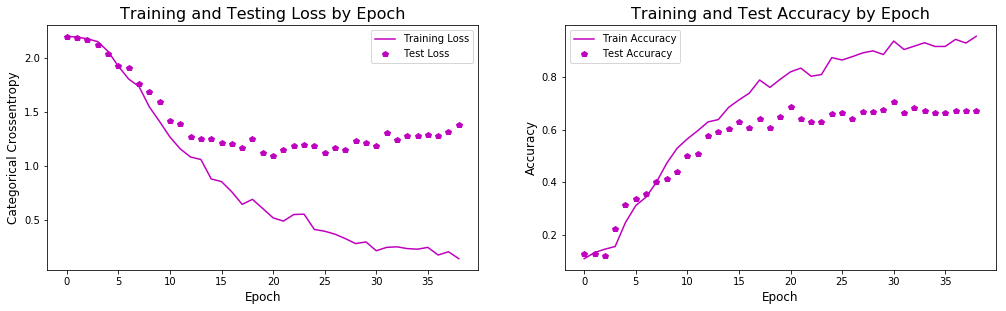

In [38]:
# CNN Model 1 Loss and Accuracy Visualizations
plot_loss_accuracy(history_1, 'CNN_Model_1_scores')

Oh no! CNN Model #1 is overfit, since the training data performs better than the testing data. The accuracy score is higher for my training data, meaning my model makes better predictions on my training data than my testing data. And the loss values are lower for my training data, meaning that my model has less errors in my training data than my testing data. However, this all actually makes sense considering that I'm training a CNN model on a small, un-augmented dataset. What I'll do in my next model is augment my data and see if that makes my model more fit. Augmenting my data creates altered versions of the same image and introduces those "new" images to the model, making it seem as if more data has been added to my dataset. I'll talk more about augmentation later. 

## Model summary 

- The `evaluate` attribute returns the loss value & metrics values for the model in test mode. Source: [Keras Model Class API](https://keras.io/models/model/)
- The `metrics_names`attribute shows "the display labels for the scalar outputs." Same source as the previous point.
- The `model.summary()` attribute prints a summary representation of your model. Source: [About Keras Models](https://keras.io/models/about-keras-models/)

In [39]:
# Evaluate model on test data
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1) 
# Save to variable
cnn_labels = cnn_model.metrics_names

print()

# Evaluate how model does
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')

print()

# Check out the model summary.
cnn_model.summary()

259/259 [==============================] - 1s 3ms/step

CNN loss  : 1.3766334876130446
CNN acc   : 0.6718146718146718

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 108, 73, 32)       320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 7, 128)        0         
_______________________

Considering that my baseline score is about 12%, my accuracy score isn't too bad at around 67%. However, my model is overfit and I want a model that's fit--this assures me that my model will be able to perform well on unseen data. The summary statement shows me what happens during each layer of my CNN model. As you can see, the dimensions of my images decrease as they pass through the model--the model is capturing the most essential parts of a facial expression which the model will rely on to predict the type of facial expression (or, rasa). Remember the visual of the CNN layers shown under the [CNN Model 1: Unmodified Dataset](#CNN-Model-1:-Unmodified-Dataset)? I relied on this summary to help me create that visual, particularly the parts of the visual that specified the image dimensions for each layer. 

# CNN Model 2: Data Augmentation

Since my original dataset is relatively small, with only a little over 1,000 images, I'll do some Keras magic to trick my model into think I have a larger, more varied dataset. Keras' `ImageDataGenerator` class generates "batches of tensor image data with real-time data augmentation. The data will be looped over (in batches)." What that means is when I `fit` my model and run my images through the model, `ImageDataGenerator` will alter my images according to my specifications and run those altered images through my model. Here are the alterations I made to my images: 
 - `rotation_range`: (int) rotates images 
 - `width_shift_range`: (float) makes image wider horizontally
 - `height_shift_range`: (float) makes image longer vertically
 - `zoom_range`: (float) randomly zooms in 
 - `shear_range`: (float) randomly applies [shear mapping](https://en.wikipedia.org/wiki/Shear_mapping)
 - `horizontal_flip`: (boolean) applies horizontal flip 
 - `fill_mode`: (`"constant"`, `"nearest"`, `"reflect"` or `"wrap"`) fills newly created pixels

Sources: 
- [Keras Image PreProcessing](https://keras.io/preprocessing/image/)
- [Keras: Building powerful image classification models using very little data](#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

## Preview data augmentation

This section, "Preview data augmentation", is here to show you what an example of `ImageDataGenerator` looks like when it's applied to images. As you can see, the sample image is horizontally flipped, zoomed in, tilted, etc. Altered copies of the images will be shown to the model to trick the model into thinking that my dataset is much larger than it is. This tool is quite the useful hack and has, in my opinion, democratized CNN modeling by allowing data scientists without access to large datasets to run this model. 

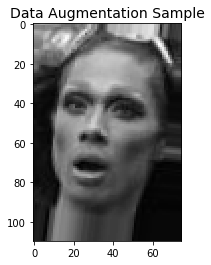

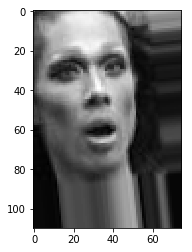

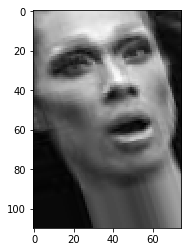

In [40]:
# Code modified from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Set parameters to modify images 
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Sample one image from original dataset
x = X[40:41]

# Reshape it to (1, 110, 75, 1)
x = x.reshape(x.shape + (1,))

# The .flow() command below generates batches of randomly transformed images 
plt.title("Data Augmentation Sample", fontsize=14)
i = 0
for im in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(im[0]), cmap=plt.cm.gray)
    i += 1
    if i % 3 == 0:
        break
        
plt.show()

[Image Source](https://www.flickr.com/photos/istolethetv/14547691835/in/photolist-oawHX2-MoQjvg-6JGaA5-HYdVtW-q1eLJd-eAgHvG-p4ndog-q16Pjx-ZnewPd-pHFi3Z-eAeqyP-9UZu2w-7kq24n-aiTZTf-gqi1T-pHHmuy-kYe27-2LURLm-8VTg3Y-6p68bA-qovm-Kz3Xy-pHHreU-dYZZGa-AKSRe-8dVuHW-duDNw2-aiTZph-d6ekGm-WNRTKn-p4jiCS-7mTWPN-pHLAZw-eAigCL-q168Uv-a7DxQd-i2dZo4-nVizxY-6JBVbB-gp1Gm-HYdHD3-p4njnR-nQG9z5-asfFGj-62LwUH-hsFKq-4rTTJh-cKzJK5-pY1cDY-d6efmY)

## Design Neural Network 

Here, I'm doing the same thing I did to build my [CNN Model 1](#CNN-Model-1:-Unmodified-Dataset).

In [41]:
# Instantiate Convolutional Neural Network
cnn_model_2 = Sequential()

# First conv module: input layer 
cnn_model_2.add(Conv2D(filters=32, 
                       kernel_size=(3,3), 
                       activation='relu', 
                       input_shape=X_train[0].shape))                     
              
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))      

# Second conv module
cnn_model_2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# Third conv module
cnn_model_2.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size = (2,2)))

# Fourth conv module
cnn_model_2.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer to pass through dense layer
cnn_model_2.add(Flatten())

# Dropout layer to avoid overfitting
cnn_model_2.add(Dropout(rate=1 - 0.5))

# Densely connected layer
cnn_model_2.add((Dense(512, activation='relu')))

# Output layer 
cnn_model_2.add(Dense(y_test.shape[1], activation='softmax'))

### Set parameters for data augmentation

Here, I apply `ImageDataGenerator` to augment my training dataset. I do not need to augment my testing dataset since the training dataset is what will be used to train my model.

In [42]:
# Set batch size 
batch_size = 64

# This is the augmentation configuration to use for training
train_datagen = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Augment training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

# I don't need to do anything to my testing data since it's already been scaled

In [43]:
# Check shape of ImageDataGenerator images
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 110, 75, 1)
labels batch shape: (64, 9)


### Compile the model and initiate `EarlyStopping`

Here I compile my model in the same way I did for [CNN Model 1](#CNN-Model-1:-Unmodified-Dataset).

In [44]:
# Compile model
cnn_model_2.compile(loss='categorical_crossentropy', # Loss function for multiclassification 
                    optimizer='adam',
                    metrics=['accuracy'])

### Fit the model

A few things are different here if you're comparing it to my CNN Model #1. For my CNN Model #2, I'm using `ImageDataGenerator` to augment my images. I fit my model by implementing `fit_generator`, and I use the `train_generator` variable which will augment my `X_train` and `y_train` dataset. 

In [45]:
# Fit the model on batches with real-time data augmentation
history_2 = cnn_model_2.fit_generator(train_generator, 
                                      steps_per_epoch=len(X_train) / 64, 
                                      epochs=100, 
                                      validation_data=(X_test, y_test),
                                      verbose=0)

## Save weights

In [46]:
# Save model weights
cnn_model_2.save_weights('./data/navarasas_data_aug_cnn_model_2.h5')  

## Visualize loss and accuracy over epoch

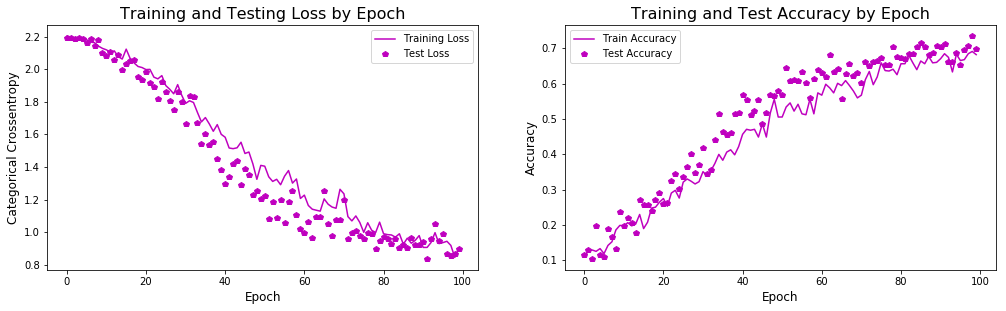

In [47]:
plot_loss_accuracy(history_2, 'CNN_Model_2_scores')

Data augmentation through `ImageDataGenerator` seems to have done the trick -- my model is no longer overfit, it's fit just right. The loss and accuracy scores for my training and testing data are in step with each other. I still want to further test out other tricks that deep learning has to provide, so for my next model (CNN Model #3) I'll train my model on the pre-trained `VGG16` model. I'll talk more about what the pre-trained `VGG16` model is later. 

## Model summary 

In [48]:
# Evaluate model on test data.
cnn_score_2 = cnn_model_2.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_labels_2 = cnn_model_2.metrics_names

print()

# Evaluate how model does
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')

print()

print(f'CNN 2 {cnn_labels_2[0]}  : {cnn_score_2[0]}')
print(f'CNN 2 {cnn_labels_2[1]}   : {cnn_score_2[1]}')

print()

# Check out the model summary.
cnn_model_2.summary()

259/259 [==============================] - 1s 3ms/step

CNN 1 loss  : 1.3766334876130446
CNN 1 acc   : 0.6718146718146718

CNN 2 loss  : 0.900082743766225
CNN 2 acc   : 0.6988416990718326

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 108, 73, 32)       320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (Ma

Even when using an augmented dataset, my model's validation accuracy score is still not significantly higher than my first model on my unmodified dataset. This could be the case given the quality of my original dataset. I hand-selected every image and categorized them into the nine rasa categories. It was difficult finding distinct facial expressions that matched the nine emotions while also maintaining balanced classes. However, my CNN Model 2 is much more fit than CNN Model 1, and the loss is significantly lower. 

Overall, I'm still pleased with my results for CNN Model 2 and am in awe of the power of CNN modeling to predict facial expressions given the poor quality of my dataset.

# CNN Model 3: VGG16
In addition to image augmentation via `ImageDataGenerator`, another trick (or hack) that deep learning allows for small datasets is the use of pre-trained models, or pre-trained networks. According to Chollet, "a pretrained network is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task." I'll be using the `VGG16` pre-trained model because it's simple, widely-used, and is also based on image classification. The `VGG16` pre-trained model was developed by K. Simonyan and A. Zisserman (read their paper: [University of Oxford, “Very Deep Convolutional Networks for Large-Scale Image Recognition”](https://arxiv.org/abs/1409.1556)). It was trained on a dataset of ~1.4 million 224x224 RGB images from ImageNet belonging to 1,000 classes. The classes are wide and varied, including images of animals, humans, inanimate objects, and so on. Of the two ways to use a pre-trained a model--through feature extraction or fine tuning--I only do feature extraction in this project. To quote Chollet again since he does a great job at explaining complex topics simply, "feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch."

Summarizing Chollet, here's what I'm doing with the `VGG16` pre-trained model. CNN models consist of two parts: a convolutional base and a densely connected classifier. Through feature extraction, what I'll be doing is "taking the convolutional base of [`VGG16`], running the new data through it, and training a new classifier on top of the output (see figure 5.14)."

Sources: 
- Deep Learning by Francois Chollet
- [VGG16 – Convolutional Network for Classification and Detection](https://neurohive.io/en/popular-networks/vgg16/)

![](./images/display_images/vgg16.png)

## Pre-process data
Since the `VGG16` model was trained on RGB images, I need to convert my grayscale to RGB images by manipulating my arrays. I'll also be implementing `ImageDataGenerator` on my dataset and running that through my model. 

### Convert grayscale arrays to RGB arrays

Earlier I had to reshape my image pixel array into a three-dimensional array like this: `(110, 75, 1)`. However, the depth of my original dataset was one, because my images were all grayscale. With RGB (red, green, blue) images, there are three sets of pixels each corresponding to one of the three aforementioned colors. As a hack, I need to trick this model into thinking my images are RGB. I'll do that by creating three copies of each image's pixels. So instead of the images being shaped like this, `(110, 75, 1)`, they'll be shaped like this `(110, 75, 3)`. This may affect how well my model performs on these grayscale images, since it was originally trained on truly RGB images. 

In [49]:
# Convert X_train from a grayscale array to an RGB array 
print(f'X_train grayscale shape: {X_train_copy.shape}')  
X_train_RGB = np.repeat(X_train_copy[..., np.newaxis], 3, -1)
print(f'X_train RGB shape: {X_train_RGB.shape}') 

X_train grayscale shape: (776, 110, 75)
X_train RGB shape: (776, 110, 75, 3)


In [50]:
# Convert X_test from a grayscale array to an RGB array 
print(f'X_test grayscale shape: {X_test_copy.shape}')  # (64, 224, 224)
X_test_RGB = np.repeat(X_test_copy[..., np.newaxis], 3, -1)
print(f'X_test RGB shape: {X_test_RGB.shape}') 

X_test grayscale shape: (259, 110, 75)
X_test RGB shape: (259, 110, 75, 3)


### Set parameters for data augmentation

I'm not doing anything new here. I use the same parameters for data augmentation that I did in my CNN Model #2. However, I need to create a new variable here, `train_generator_aug`, because I'm now using my RGB dataset, `X_train_RGB`. 

In [51]:
# Set batch size 
batch_size = 64 

# This is the augmentation configuration we will use for training
train_datagen_aug = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Augment training data
train_generator_aug = train_datagen_aug.flow(X_train_RGB, y_train, batch_size=batch_size)

In [52]:
# Check shape of ImageDataGenerator images
for data_batch, labels_batch in train_generator_aug:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 110, 75, 3)
labels batch shape: (64, 9)


## Set up  and run VGG16 model

Fortunately, Keras has a built-in `VGG16` model that I can just load by importing it from their library. In this section, I start by instantiating `VGG16`. I specify my `input_shape` to be `(110, 75, 3)`, and `include_top` is set to `False` because I want to "unfreeze" the last densely connected layers of the model so that I can set it give me my specific outputs, which are the nine rasas. 

In [53]:
# Load the model
vgg = VGG16(input_shape=(110, 75, 3), # Specifying the weights in my dataset 
            include_top=False) # Doesn't include the densely connected classifier on top of the network

As you can see in the cell below, I instantiate an empty neural network (`Sequential()`) and resuse `VGG16`'s convolutional base (`cnn_model_3.add(vgg)`). Because I set `include_top` to `False`, here I have to add my own customized classifier layers. 

In [54]:
# Create the model
cnn_model_3 = Sequential()
 
# Add the VGG16 convolutional base model
cnn_model_3.add(vgg)
 
# Add new trained classifier layers
cnn_model_3.add(Flatten())
cnn_model_3.add(Dense(256, activation='relu'))
cnn_model_3.add(Dropout(rate = 1 - 0.5))
cnn_model_3.add(Dense(y_test.shape[1], activation='softmax'))

In [55]:
cnn_model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 2, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 2313      
Total params: 15,503,689
Trainable params: 15,503,689
Non-trainable params: 0
_________________________________________________________________


In the `cnn_model_3.summary()` above, you can see that there are indeed nine neurons in my output layer, `dense_8 (Dense)`. In the `Param #` column, the first row corresponds to `VGG16`'s model, which has 14.7 million parameters. The `Total params` is now 15.5 million, the difference being the number of parameters of my dataset. What I need to do next is freeze the convolutional base. According to Chollet, "Freezing a layer or set of layers means preventing their weights from being updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because the `Dense` layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned." Furthermore, Chollet states, "With this setup [see below when I set `vgg.trainable` to be `False`], only the weights from the two Dense layers that you added will be trained. That’s a total of four weight tensors: two per layer (the main weight matrix and the bias vector)."

Source: Deep Learning by Francois Chollet

In [56]:
print(f'This is the number of trainable weights before freezing the conv base: {len(cnn_model_3.trainable_weights)}')

This is the number of trainable weights before freezing the conv base: 30


In [57]:
# Freeze network to prevent weights from being updated during training
vgg.trainable = False

In [58]:
print(f'This is the number of trainable weights after freezing the conv base: {len(cnn_model_3.trainable_weights)}')

This is the number of trainable weights after freezing the conv base: 4


Below, I compile my model as I have done in my previous models. 

In [59]:
# Compile model
cnn_model_3.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

Since I had to change the dimensions of my image dataset into RGB, my `validation_data` will process `X_test_RGB`.

In [60]:
# Fit the model on batches with real-time data augmentation
history_3 = cnn_model_3.fit_generator(train_generator_aug, 
                                      steps_per_epoch=150, 
                                      epochs=30, 
                                      validation_data=(X_test_RGB, y_test), 
                                      validation_steps=50,
                                      verbose=0)

## Save weights

In [61]:
# Save model weights
cnn_model_3.save_weights('./data/navarasas_data_vgg_cnn_model_3.h5')  

## Visualize loss and accuracy over epoch

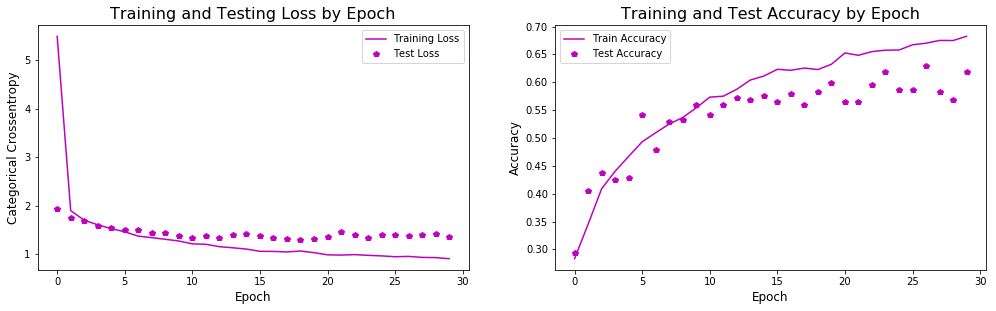

In [62]:
plot_loss_accuracy(history_3, 'CNN_Model_3_scores')

Given the enormous dataset that the `VGG16` was trained on, I was _hoping_ that the model would detect facial expressions much better than my previous modes, but on the other hand, I was _expecting_ it to perform poorly as it did here. The model starts to become slightly overfit in terms of accuracy scores towards the end of the epoch range. I could have tried to run more epochs, but running this model is severely time-consuming! I attempted to initiate `EarlyStopping` so that the model would automatically stop at an optimal epoch, but this method made my model stop too early at less than 10 epochs. I speculate that this model didn't perform well on my dataset for several reasons: 
- `VGG16` was trained on RGB images, and my images are all grayscale 
- `VGG16` was trained on numerous images and may not perform well on my relatively small facial expression dataset
- `VGG16` was trained on images with dimensions of 224x224 

If I want to improve my scores for this model, I would try the following steps: 
- Use an RGB dataset 
- Possibly find other pre-trained models that are trained on: 1) grayscale images, OR 2) images of faces predominantly
- Use a larger dataset
- Adhere to the image dimensions of my pre-trained model (even though this one took my image dimensions)

## Model summary

In [63]:
# Evaluate model on test data.
cnn_score_3 = cnn_model_3.evaluate(X_test_RGB,
                                   y_test,
                                   verbose=1)

cnn_labels_3 = cnn_model_3.metrics_names

print()

# Evaluate how model does
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')

print()

print(f'CNN 2 {cnn_labels_2[0]}  : {cnn_score_2[0]}')
print(f'CNN 2 {cnn_labels_2[1]}   : {cnn_score_2[1]}')

print()

print(f'CNN 3 {cnn_labels_3[0]}  : {cnn_score_3[0]}')
print(f'CNN 3 {cnn_labels_3[1]}   : {cnn_score_3[1]}')

print()

# Check out the model summary.
cnn_model_3.summary()

259/259 [==============================] - 19s 73ms/step

CNN 1 loss  : 1.3766334876130446
CNN 1 acc   : 0.6718146718146718

CNN 2 loss  : 0.900082743766225
CNN 2 acc   : 0.6988416990718326

CNN 3 loss  : 1.3429756275014988
CNN 3 acc   : 0.6177606179907515

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 2, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 2313      
Total params: 15

### Overall Model Assessment

This is the last model that I'll be running, so I'll take this opportunity to do an overall model assessment. Referring to the summary above, you can see that CNN Model #2 performed the best, with the lowest loss and highest accuracy, and most fit model. Here's a summary of what I did for each model: 

**CNN Model 1**
- Description: unmodified dataset
- Epochs: 39
- Fit?: Overfit 😢
- Test Loss: 1.4
- Test Acc: 67%

⭐️⭐️**CNN Model 2 [BEST MODEL]** ⭐️⭐️
- Description: augmented dataset
- Epochs: 100
- Fit?: Fit! 😄
- Test Loss: 0.9
- Test Acc: 70%

**CNN Model 3**
- Description: augmented dataset, `VGG16` pre-trained
- Epochs: 30
- Fit?: Slightly overfit 😕
- Test Loss: 1.3
- Test Acc: 62%

# Make predictions!

CNN Model #2 was my best performing model, so I'll use predictions from that model moving forward. Now remember, when I prepped my data to run it through my model, I had to make several adjustments (see list) that I'll have to undo here: 
- Converting pixel values to percentages: Now, change back to pixels 
- Reshaping my arrays: Now, change back to `(110, 75)` instead of `(110, 75, 1)`

After doing these steps, I can now make predictions on my testing data. Remember, the goal of building this model is to see how well it can predict the navarasa (nine emotions) from an image of a person's facial expression. To do this, I initiate the attribute `model.predict_classes(X_test)`, and I will get an output of predictions (i.e., what the model predicts the emotions are of the images in my testing set). This output will be numeric, where a range of numbers between 0-8 are assigned to one of the nine rasas. I'll convert those numbers back to the names of the rasas. 

Next, I'll also get the distribution of probabilities for what the model predicted the navarasas were for each image (`model.predict(X_test)`). Remember in my CNN, the final output layer contained nine neurons for the nine emotions. When an images passes through the model, the model will predict a distribution of probabilities corresponding to the nine emotions. 

I'll go into more detail about all of these steps below. 

## Reverse changes made to testing data

Prep testing data to make predictions. The goal is to make sure that the image array is converted back to pixels and that each image can be visualized again.

In [64]:
# Reset variables 
X_test_1 = X_test.copy()

# Undo scale to convert pixels from 0-1 range to 0-255 range
X_test_1 *= 255

# Reshape the X_test since I only need to make predictions on the testing data, 
# not the training data
X_test_1 = X_test_1.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Show shape of reshaped X_test_1
print(f'Shape of X_test_1: {X_test_1.shape}')

Shape of X_test_1: (259, 110, 75)


In [65]:
# Check X_test_1 to see if it's been converted back to pixel range 0-255
X_test_1[0]

array([[ 14.,  14.,  13., ...,  31.,  31.,  31.],
       [ 15.,  14.,  14., ...,  35.,  35.,  35.],
       [ 15.,  15.,  14., ...,  37.,  37.,  37.],
       ...,
       [ 19.,  41., 115., ...,  24.,  33.,  40.],
       [ 25.,  32., 105., ...,  22.,  31.,  38.],
       [ 30.,  25.,  98., ...,  21.,  30.,  37.]], dtype=float32)

## Get predicted labels 

Here, I'll get an output of predictions for what rasa (emotion) the model thinks an image is. I do that by running `cnn_model_2.predict_classes(X_test)`. What this is doing is using my CNN Model 2 to make predictions on my testing data. The output will be numbers, 0-8, each corresponding to a rasa. I'll convert those numbers back to the rasa words to make it easier to decipher what the predictions are. 

In [66]:
# Get predicted classes from unaltered X_test
pred_labels = cnn_model_2.predict_classes(X_test)

# Preview of predicted labels (labels correspond to the nine emotions)
pred_labels[20:30]

array([5, 5, 7, 2, 8, 7, 8, 6, 8, 5])

In [67]:
# Create named labels dictionary
rasas_dict = {0: 'adbhuta (astonishment)', 
              1: 'bibhatsa (disgust)', 
              2: 'bhayanaka (fear)', 
              3: 'hasya (joy)', 
              4: 'karuna (sorrow)', 
              5: 'roudra (anger)', 
              6: 'santa (peace)', 
              7: 'srngara (love)', 
              8: 'veera (confidence)'} 

# Convert numbers to associated rasa (emotion)
pred_labels = np.vectorize(rasas_dict.get)(pred_labels)

# Preview predicted labels
pred_labels[20:30]

array(['roudra (anger)', 'roudra (anger)', 'srngara (love)',
       'bhayanaka (fear)', 'veera (confidence)', 'srngara (love)',
       'veera (confidence)', 'santa (peace)', 'veera (confidence)',
       'roudra (anger)'], dtype='<U22')

## Get actual labels

For the steps below, I want to determine what the original, or actual, emotion labels are of my testing dataset. Remember earlier when I implemented this on my `y` data: `y_test = np_utils.to_categorical(y_test, 9)`? That step created an array with nine columns, each column corresponding to a specific rasa. Luckily, I saved an unaltered version of my `y_test` data, and I'll just do the same steps as I did above to get my actual labels.

In [68]:
# Preview y_test_copy labels
y_test_copy[20:30]

array([5, 5, 3, 2, 8, 7, 8, 6, 8, 2])

In [69]:
# Convert numbers to associated rasa (emotion)
actual_labels = np.vectorize(rasas_dict.get)(y_test_copy)

# Preview actual labels
actual_labels[20:30]

array(['roudra (anger)', 'roudra (anger)', 'hasya (joy)',
       'bhayanaka (fear)', 'veera (confidence)', 'srngara (love)',
       'veera (confidence)', 'santa (peace)', 'veera (confidence)',
       'bhayanaka (fear)'], dtype='<U22')

## Get prediction probabilities

I already have the predicted labels (rasa) for each image, but I want to know the probabilities that my model predicted all nine emotions for each image. To get these probabilities, I'll run `cnn_model_2.predict(X_test)`, which gives me an output of nine values, all adding up to 1.0, for each image. I convert my probabilities into a DataFrame to make it easy for me to reference certain probabilities when I visualize my results below.

In [70]:
# Assign variable to hold all prediction probability results
prediction_proba_array = cnn_model_2.predict(X_test)

In [71]:
# Preview the array. This shows the probabilities that the CNN model predicted 
# for each of the 9 emotions
prediction_proba_array[0]

array([8.4723933e-03, 3.1831616e-03, 5.9553072e-02, 3.5440969e-06,
       1.4159635e-02, 8.9480126e-01, 1.8813850e-08, 1.2954153e-03,
       1.8531449e-02], dtype=float32)

In [72]:
# Save all rasas to a list
rasa_list = ['adbhuta (astonishment)', 
             'bibhatsa (disgust)', 
             'bhayanaka (fear)', 
             'hasya (joy)', 
             'karuna (sorrow)', 
             'roudra (anger)', 
             'santa (peace)', 
             'srngara (love)', 
             'veera (confidence)'] 

# Convert array to DataFrame 
prediction_proba_df = pd.DataFrame(prediction_proba_array, columns=rasa_list)

# Preview DataFrame
prediction_proba_df.head(2)

,adbhuta (astonishment),bibhatsa (disgust),bhayanaka (fear),hasya (joy),karuna (sorrow),roudra (anger),santa (peace),srngara (love),veera (confidence)
0,0.008472,0.003183,0.059553,0.000004,0.014160,0.894801,1.881385e-08,0.001295,0.018531
1,0.001483,0.003428,0.043618,0.000001,0.145147,0.782952,3.060969e-10,0.020060,0.003310


## Visualize prediction probabilities of rasas (emotions)

Putting it all together. In the visualizations below, I show you what the actual emotion is for each image, what emotion the model predicted the image belonged to, and what the probability of that prediction was. You'll see that some images have a high probability of one or two emotions, while others have a wide ranging distribution of predicted emotions.

In [73]:
# Function to graph image and probability of predictions
def show_prediction_proba(n):
    # This code block will print interpretation of results
    pred_series = prediction_proba_df.loc[n].sort_values(ascending=False)
    true_perc = round(prediction_proba_df.loc[n][actual_labels[n]]*100,2)
    if actual_labels[n] == pred_series.index[0]:
        print("\U0001f600 CORRECT PREDICTION!")
    elif (round(pred_series[0]*100,2) - true_perc <= 4) & (actual_labels[n] != pred_series.index[0]):
        print("\U0001F610 INCORRECT PREDICTION, but close call!")
    else:
        print("\U0001F612 INCORRECT PREDICTION!")
    print(f' - Probability of predicting actual emotion ({actual_labels[n]}): {true_perc}%')
    message = (f'This face is expressing the {actual_labels[n]} ' 
               f'emotion, and the model predicted it is showing ' 
               f'the {pred_series.index[0]} emotion. '
               f'The model made the highest prediction at {round(pred_series[0]*100,2)}% '
               f'for the emotion of {pred_series.index[0]}, '
               f'followed by {round(pred_series[1]*100,2)}% for '
               f'for the emotion of {pred_series.index[1]}.')
    print()
    print(message)
            
    # Set parameters for subplot
    fig, axes = plt.subplots(1, 2, figsize=(8,4))
    fig.subplots_adjust(wspace=.88)
    ax = axes.ravel()
    
    # Plot image
    ax[0].imshow(X_test_1[n], cmap=plt.cm.gray)
    
    # Set image plot title to the actual label
    ax[0].set_title(f'Actual: {actual_labels[n]}', size=13)
    
    # Plot predicted probabilities distribution
    ax[1].barh(rasa_list, prediction_proba_array[n], color='purple')
    ax[1].barh
    
    # Set distribution plot title to predicted label
    ax[1].set_title(f'Predicted: {pred_labels[n]}', size=13)
    fig.savefig(f'./images/dataviz/prediction_{n}.png', bbox_inches = 'tight'); 

😀 CORRECT PREDICTION!
 - Probability of predicting actual emotion (hasya (joy)): 99.99%

This face is expressing the hasya (joy) emotion, and the model predicted it is showing the hasya (joy) emotion. The model made the highest prediction at 99.99% for the emotion of hasya (joy), followed by 0.01% for for the emotion of bhayanaka (fear).


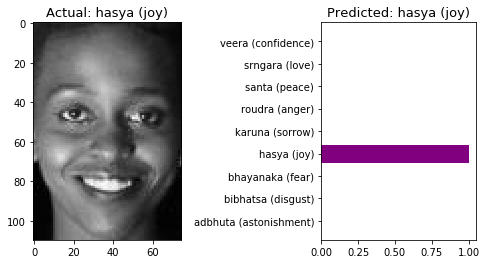

In [74]:
show_prediction_proba(78)

😀 CORRECT PREDICTION!
 - Probability of predicting actual emotion (srngara (love)): 55.97%

This face is expressing the srngara (love) emotion, and the model predicted it is showing the srngara (love) emotion. The model made the highest prediction at 55.97% for the emotion of srngara (love), followed by 24.55% for for the emotion of hasya (joy).


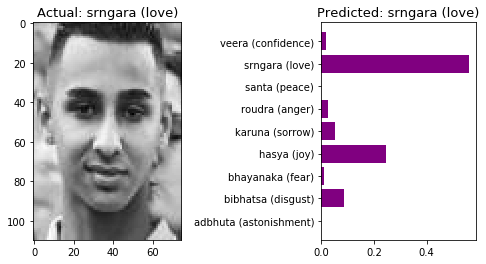

In [75]:
show_prediction_proba(249)

😀 CORRECT PREDICTION!
 - Probability of predicting actual emotion (bhayanaka (fear)): 48.38%

This face is expressing the bhayanaka (fear) emotion, and the model predicted it is showing the bhayanaka (fear) emotion. The model made the highest prediction at 48.38% for the emotion of bhayanaka (fear), followed by 39.79% for for the emotion of roudra (anger).


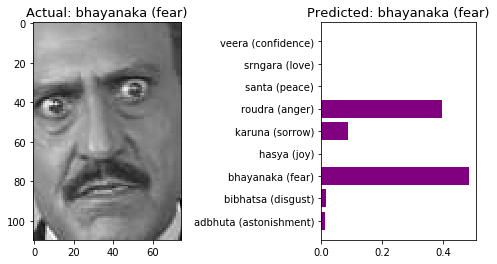

In [76]:
show_prediction_proba(246)

😒 INCORRECT PREDICTION!
 - Probability of predicting actual emotion (bibhatsa (disgust)): 9.45%

This face is expressing the bibhatsa (disgust) emotion, and the model predicted it is showing the karuna (sorrow) emotion. The model made the highest prediction at 24.61% for the emotion of karuna (sorrow), followed by 21.11% for for the emotion of bhayanaka (fear).


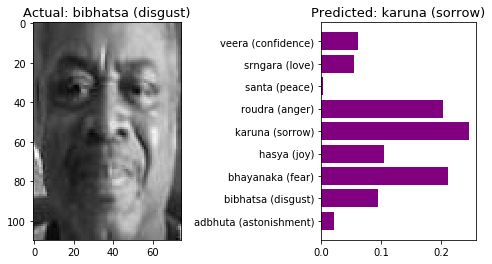

In [77]:
show_prediction_proba(124)

😀 CORRECT PREDICTION!
 - Probability of predicting actual emotion (santa (peace)): 95.18%

This face is expressing the santa (peace) emotion, and the model predicted it is showing the santa (peace) emotion. The model made the highest prediction at 95.18% for the emotion of santa (peace), followed by 2.94% for for the emotion of veera (confidence).


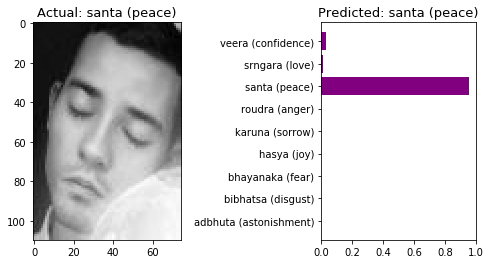

In [78]:
show_prediction_proba(238)

😀 CORRECT PREDICTION!
 - Probability of predicting actual emotion (roudra (anger)): 45.95%

This face is expressing the roudra (anger) emotion, and the model predicted it is showing the roudra (anger) emotion. The model made the highest prediction at 45.95% for the emotion of roudra (anger), followed by 33.94% for for the emotion of veera (confidence).


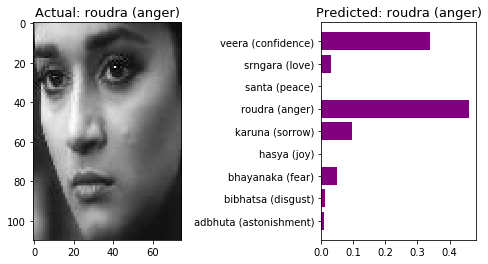

In [79]:
show_prediction_proba(160)

😒 INCORRECT PREDICTION!
 - Probability of predicting actual emotion (karuna (sorrow)): 11.93%

This face is expressing the karuna (sorrow) emotion, and the model predicted it is showing the bhayanaka (fear) emotion. The model made the highest prediction at 45.39% for the emotion of bhayanaka (fear), followed by 20.46% for for the emotion of bibhatsa (disgust).


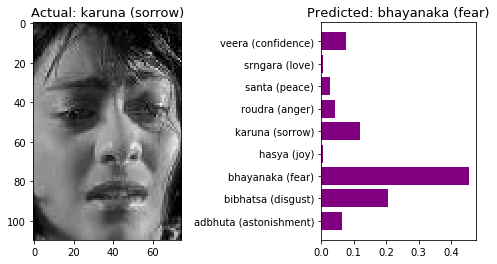

In [80]:
show_prediction_proba(250)

😀 CORRECT PREDICTION!
 - Probability of predicting actual emotion (veera (confidence)): 81.73%

This face is expressing the veera (confidence) emotion, and the model predicted it is showing the veera (confidence) emotion. The model made the highest prediction at 81.73% for the emotion of veera (confidence), followed by 7.25% for for the emotion of srngara (love).


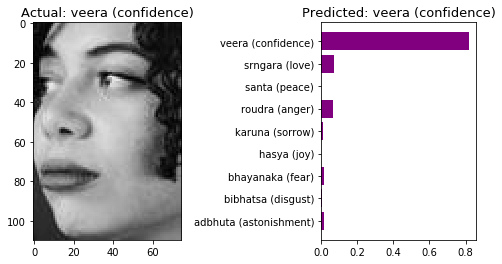

In [81]:
show_prediction_proba(28)

😒 INCORRECT PREDICTION!
 - Probability of predicting actual emotion (adbhuta (astonishment)): 7.34%

This face is expressing the adbhuta (astonishment) emotion, and the model predicted it is showing the bhayanaka (fear) emotion. The model made the highest prediction at 49.64% for the emotion of bhayanaka (fear), followed by 27.32% for for the emotion of roudra (anger).


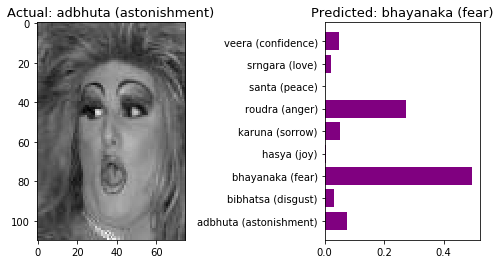

In [82]:
show_prediction_proba(163)

## Predict vs Actual Visualization

Here, I'll create a visualization to show me a comparative analysis on the model's predictions
between actual emotions (i.e., what emotion the image actually is) and prediction emotions (i.e.,
what emotion the model predicted the image is).

In [83]:
# Set variables for actual values
y_test_actual = pd.DataFrame(y_test_copy, columns = ['rasas'])

# Set variables for predicted values
y_test_pred = pd.DataFrame(pred_labels, columns = ['rasas'])

In [84]:
print(f'These are the actual labels of the test dataset.')
# Preview dataframe
y_test_actual.head()

These are the actual labels of the test dataset.


,rasas
0,5
1,5
2,3
3,1
4,3


In [85]:
print(f'These are the predicted labels of the test dataset.')
# Preview dataframe
y_test_pred.head()

These are the predicted labels of the test dataset.


,rasas
0,roudra (anger)
1,roudra (anger)
2,hasya (joy)
3,roudra (anger)
4,hasya (joy)


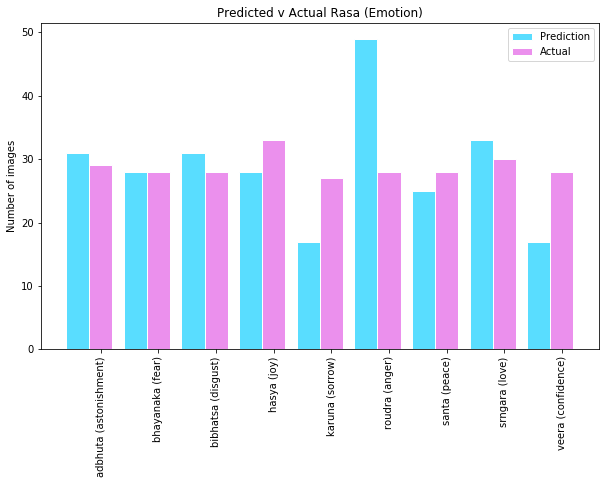

According to to the "Predicted v Actual Rasa (Emotion)" visualization, the model tended to: 
 - overpredict the emotions: ['adbhuta (astonishment)', 'bibhatsa (disgust)', 'roudra (anger)', 'srngara (love)'] 
 - underpredict the emotions: ['hasya (joy)', 'karuna (sorrow)', 'santa (peace)', 'veera (confidence)'] 
 - predict perfectly the emotions: ['bhayanaka (fear)']


In [86]:
# Set values to variables 
y_pred_series = y_test_pred['rasas'].value_counts()
y_act_series = y_test_actual['rasas'].map(rasas_dict).value_counts()

# Code modified from https://python-graph-gallery.com/11-grouped-barplot/
# Plot size, title
plt.figure(figsize=(10, 6))
plt.title("Predicted v Actual Rasa (Emotion)")

# Bar width
barWidth = 0.4
 
# Bar height
bars_pred = list(y_pred_series.sort_index())
bars_act = list(y_act_series.sort_index())
 
# Set position of bar on X axis
r1 = np.arange(len(bars_pred))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars_pred, color='#59ddff', width=barWidth, edgecolor='white', label='Prediction')
plt.bar(r2, bars_act, color='#eb90ed', width=barWidth, edgecolor='white', label='Actual')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars_act))], 
           list(y_test_pred['rasas'].value_counts().sort_index().index), 
           rotation=90)

plt.ylabel("Number of images") 
    
# Create legend & Show graphic
plt.legend()
plt.show()
fig.savefig(f'./images/dataviz/predict_v_actual.png', bbox_inches = 'tight')

# Print interpretation of graph! 
overpredict = []
underpredict = []
truepred = []
for rasa in rasa_list: 
    if y_pred_series[rasa] > y_act_series[rasa]:
        overpredict.append(rasa)
    elif y_pred_series[rasa] < y_act_series[rasa]:
        underpredict.append(rasa)
    else:
        truepred.append(rasa)

message = (f'According to to the "Predicted v Actual Rasa (Emotion)" visualization, '
           f'the model tended to: \n - overpredict the emotions: {overpredict} '
           f'\n - underpredict the emotions: {underpredict} '
           f'\n - predict perfectly the emotions: {truepred}')

print(message)

## Confusion Matrix

This confusion matrix will help me interpret the predictions more closely, where I'll be able to see which emotions the model tended to confuse with each other, and how well predictions were made for each emotion. 

In [87]:
# Map emotion strings to labels
y_test_actual['labels'] = y_test_actual['rasas'].map(rasas_dict)

# Preview dataframe
y_test_actual.head()

,rasas,labels
0,5,roudra (anger)
1,5,roudra (anger)
2,3,hasya (joy)
3,1,bibhatsa (disgust)
4,3,hasya (joy)


In [88]:
# Create a confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_actual['labels'], y_test_pred)
cnf_matrix

array([[22,  4,  0,  0,  0,  3,  0,  0,  0],
       [ 4, 17,  0,  0,  0,  7,  0,  0,  0],
       [ 1,  0, 20,  0,  1,  2,  1,  2,  1],
       [ 0,  1,  4, 27,  0,  0,  0,  1,  0],
       [ 0,  2,  5,  0, 13,  6,  1,  0,  0],
       [ 1,  4,  0,  0,  1, 21,  0,  1,  0],
       [ 0,  0,  1,  0,  1,  0, 23,  2,  1],
       [ 0,  0,  0,  0,  1,  2,  0, 25,  2],
       [ 3,  0,  1,  1,  0,  8,  0,  2, 13]])

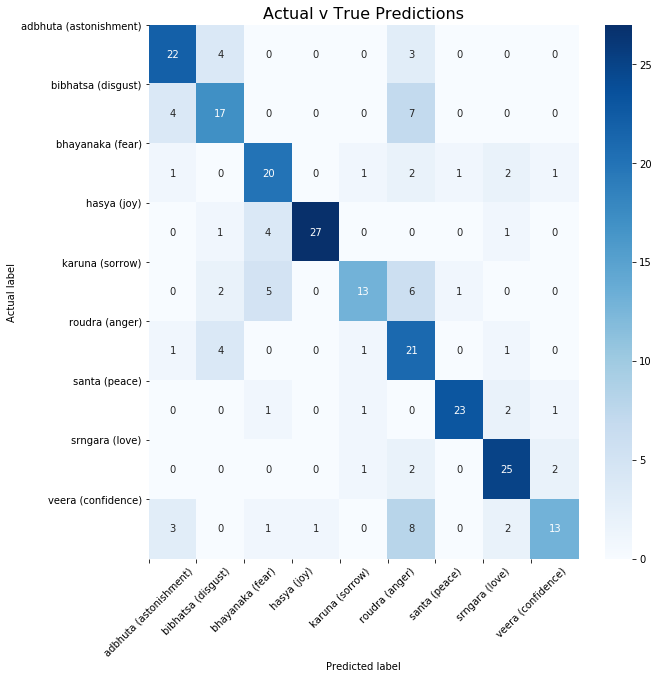

In [89]:
# Set fig and axes to visualize confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
ticks = np.arange(len(rasa_list))

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Actual v True Predictions', fontsize=16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(ticks, rasa_list, rotation=45)
plt.yticks(ticks, rasa_list, rotation=360)
fig.savefig(f'./images/dataviz/conf_matrix.png', bbox_inches = 'tight');

The model tended to confuse the following emotions with each other: 
  - roudra (anger) and veera (confidence)
  - roudra (anger) and bibhatsa (disgust)
  - roudra (anger) and karuna (sorrow)

# Conclusion and Next Steps

My main priorities while working on this project were to have a clear and strategic workflow for: 
 - addressing bias in AI
 - implenting a convolutional neural network 
 
My biggest challenge while working on this project was building a robust and good-quality dataset. My dataset consists of images all types of faces, including those of people of color, young and old people, and gender non-conforming people. It was difficult to meet my requirements while also building a large dataset and maintaining balanced classes for each emotion. In the end, my dataset was balanced, but the size was small and the distinctness between each emotion could be improved. Therefore, my dataset affected the performance of my models. Moving forward, I will attempt to build a larger and better-quality dataset. 

Additionally, I want to take advantage of more pre-trained neural networks. The one I used in this project, `VGG16`, was trained on a large variety of images that were RGB and 224 x 224. Moving forward, I will attempt to create a dataset where dimensions and color scheme match closely to a pre-trained network of my choosing. 

Overall, I am pleased with what I have achieved by completing this project, which include the following: 
 - Address bias in AI through having a: 
   - (1) diverse and inclusive dataset of images
   - (2) non-dominant framework for categorizing emotions 
   - (3) personal understanding of bias in AI through my own lived experiences
 - Make accessible to all a step-by-step guide for addressing bias in AI
 - Introduce new, critical ways for approaching a data science problem 
 - But also, introduce a first-step for many to think even deeper about addressing bias in AI 